**Intro**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [39]:
!pip install pmdarima --quiet
import pmdarima as pm

<font size="5">**Data Preprocess**</font>

In [40]:
#Read data and remove non-US cities
df = pd.read_csv("/kaggle/input/historical-hourly-weather-data/temperature.csv", delimiter = ",")
df = df.drop('Vancouver', axis=1)
df = df.drop('Toronto', axis=1)
df = df.drop('Beersheba', axis=1)
df = df.drop('Montreal', axis=1)
df = df.drop('Tel Aviv District', axis=1)
df = df.drop('Eilat', axis=1)
df = df.drop('Haifa', axis=1)
df = df.drop('Nahariyya', axis=1)
df = df.drop('Jerusalem', axis=1)

df.head(3)

,datetime,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Philadelphia,New York,Boston
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,283.850000,294.030000,284.030000,298.17000,288.650000,299.720000,281.000000,285.630000,288.220000,287.170000
2,2012-10-01 14:00:00,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,...,283.889394,294.035341,284.069789,298.20523,288.650172,299.732518,281.024767,285.663208,288.247676,287.186092


In [41]:
df.describe()

,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,...,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Philadelphia,New York,Boston
count,45252.000000,44460.000000,45250.000000,45250.000000,45252.000000,45252.000000,45250.000000,45252.000000,45252.000000,45252.000000,...,45246.000000,45247.000000,45252.000000,45252.000000,45250.000000,44448.000000,45250.000000,45250.000000,44460.000000,45250.000000
mean,284.992929,288.155821,284.409626,290.846116,290.215044,292.424887,295.493358,285.617856,282.839407,293.785646,...,284.771904,289.772673,282.971668,294.333380,288.897483,298.181274,284.053939,285.374168,285.400406,283.779823
std,7.452438,5.332862,6.547986,6.460823,5.889992,10.829522,9.916743,9.853484,10.673464,8.303688,...,11.043634,8.703643,11.034481,6.682162,9.133072,4.190185,10.453927,10.242377,10.220932,9.802499
min,262.370000,272.300000,263.780000,266.503667,265.783333,260.561333,266.059000,255.042333,247.727667,265.050000,...,244.866333,259.500000,243.483333,268.610000,255.658333,275.233333,249.422667,250.390000,250.774000,249.540000
25%,279.850000,284.670000,279.830000,286.380000,286.254750,283.920000,287.680000,277.970000,275.060000,288.600000,...,276.110000,283.320417,274.690000,290.040875,282.010000,296.030000,275.857427,277.350636,277.370000,276.090000
50%,284.320000,287.610000,283.940000,290.530000,290.118750,292.027486,295.586667,286.120000,282.970667,295.184250,...,285.929333,291.050000,283.540000,295.640000,290.120000,298.880000,285.220000,285.927583,285.870000,284.133250
75%,289.451750,291.015167,288.530000,295.080000,294.107542,300.835000,303.050000,292.835643,290.680000,299.490000,...,293.960000,296.290000,292.231250,299.140000,295.770000,300.992375,292.580000,293.796000,293.760000,291.620000
max,312.520000,313.620000,307.300000,315.470000,313.360000,318.640000,321.220000,312.710000,313.750000,313.660000,...,312.040000,310.760000,308.050000,310.150000,310.900000,308.680000,306.290000,308.000000,310.240000,308.000000


In [42]:
#Take all hourly US city temperatures and condense into a single hourly US average temperature column
df['USAvgTemp'] = df[['Portland', 'San Francisco', 'Seattle', 'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque', 'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City', 'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis', 'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami', 'Pittsburgh', 'Philadelphia', 'New York', 'Boston']].mean(axis=1)
df = df.loc[:,[ 'datetime','USAvgTemp']]
df.head(3)

,datetime,USAvgTemp
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,288.471111
2,2012-10-01 14:00:00,288.487097


In [43]:
#Convert from hourly measurements to daily averages
df['DATE'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d')
davg_df = df.groupby(pd.Grouper(freq='D', key='DATE')).mean(numeric_only=True)


# monthly
#davg_df2 = df.groupby(pd.Grouper(freq='M', key='DATE')).mean()

davg_df.head(3)

,USAvgTemp
DATE,
2012-10-01,288.646997
2012-10-02,291.376971
2012-10-03,292.790571


<font size="5">**Data Cleaning**</font>



In [44]:
#Remove nulls
davg_df[davg_df.isnull()]

#monthly
#davg_df2[davg_df2.isnull()]

,USAvgTemp
DATE,
2012-10-01,NaN
2012-10-02,NaN
2012-10-03,NaN
2012-10-04,NaN
2012-10-05,NaN
...,...
2017-11-26,NaN
2017-11-27,NaN
2017-11-28,NaN


In [45]:
davg_df['Points'] = range(0,len(davg_df.index.values))

#monthly
#davg_df2['Points'] = range(0,len(davg_df2.index.values))

In [46]:
#convert from kelvin to Fahrenheit
davg_df['USAvgTemp'] = (davg_df['USAvgTemp'] - 273.15) * 9/5 + 32

#monthly
#davg_df2['USAvgTemp'] = (davg_df2['USAvgTemp'] - 273.15) * 9/5 + 32

<font size="5">**Exploring and Visualization**</font>

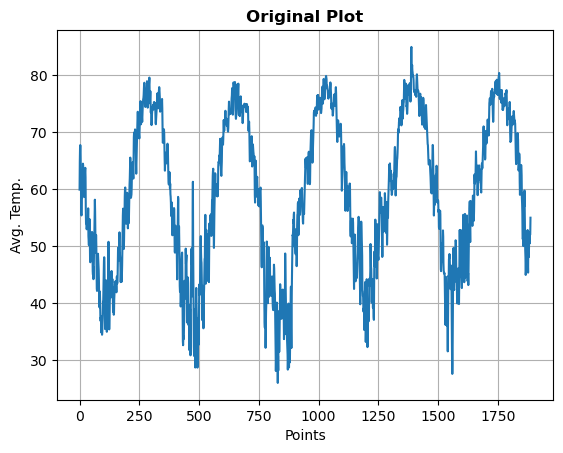

In [47]:
#plot the original figure with US average temperatures in Fahrenheit over number of data points
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Points')
ax1.set_ylabel('Avg. Temp.')
ax1.set_title('Original Plot', fontweight='bold')
ax1.plot('Points', 'USAvgTemp', data = davg_df);
plt.grid(True)

**adfuller import** to perform Augmented Dickey-Fuller Test to determine if time series data is **stationary**


In [48]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt

def stationary_ts_check(ts):
    #drop missing values from the time series
    ts = ts.dropna()

    #describe the time series
    description = ts.describe()
    print(description)

    #compute moving average with min_periods=1 (after dropping missing values)
    mov_avg = ts.rolling(window=325, min_periods=1).mean()

    #plot original and moving average/rolling mean
    plt.figure(figsize=(10, 6))
    plt.plot(ts, color='orange', label='Original data')
    plt.plot(mov_avg, color='blue', label='Moving Average')
    plt.xlabel('Time (Years)')
    plt.ylabel('Average Temperature (F)')
    plt.title('Original Time Series and Moving Average',fontweight='bold')
    plt.legend()
    plt.grid(True)
    plt.show()

    #Augmented Dickey-Fuller test
    print('Augmented Dickey-Fuller test:')
    adf_output = adfuller(ts)
    df_result = pd.Series(adf_output[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    df_result['p-value (Expressed in %)'] = adf_output[1] * 100  # Express p-value as a percentage
    for key, value in adf_output[4].items():
        df_result['Critical Value (%s)' % key] = value
    print(df_result)


count    1887.000000
mean       58.893479
std        13.543780
min        25.968384
25%        47.786674
50%        59.417001
75%        72.016946
max        84.938500
Name: USAvgTemp, dtype: float64


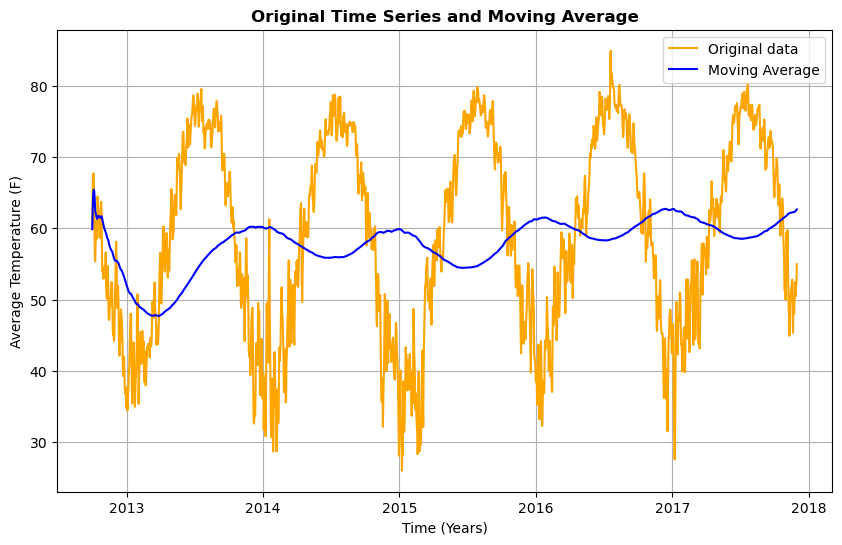

Augmented Dickey-Fuller test:
Test Statistic                   -2.438240
p-value                           0.131233
#Lags Used                       22.000000
Number of Observations Used    1864.000000
p-value (Expressed in %)         13.123293
Critical Value (1%)              -3.433863
Critical Value (5%)              -2.863092
Critical Value (10%)             -2.567596
dtype: float64


In [49]:
stationary_ts_check(davg_df.USAvgTemp)

**Original Data** - unmodified time series dataset

**Rolling Mean/ Moving Average** - Moving Average window calculated per 325 data points

**Visual check**- rolling mean appears to have significant trends/patterns - likely not stationary

**Augmented Dickey-Fuller test-** null hypothesis is rejected if p-value <5% - p value is 13%, null hypothesis not rejected. differencing is neccessary to make dataset stationary

**Number of Observations Used** - datapoints - # of lags -1



In [50]:
davg_df.USAvgTemp.describe() #current data set summary

count    1887.000000
mean       58.893479
std        13.543780
min        25.968384
25%        47.786674
50%        59.417001
75%        72.016946
max        84.938500
Name: USAvgTemp, dtype: float64

In [51]:
len(davg_df) #length of datapoints

1887

**Difference once to make data stationary**

In [52]:
davg_df['USAvgTempDiff'] = davg_df['USAvgTemp'].diff()

#remove the first row since it will have NaN value after differencing
davg_df = davg_df.dropna()

count    1886.000000
mean       -0.002613
std         2.276339
min       -10.954721
25%        -1.219747
50%         0.091245
75%         1.240199
max        14.632360
Name: USAvgTempDiff, dtype: float64


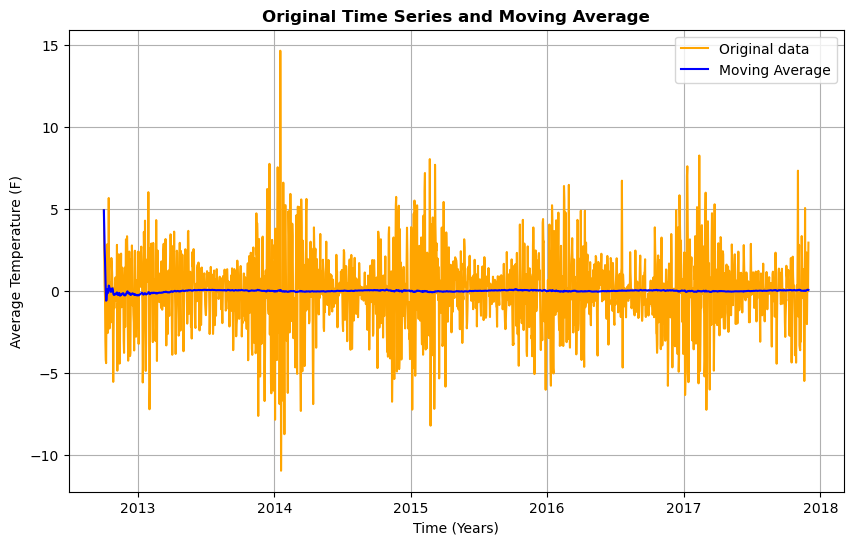

Augmented Dickey-Fuller test:
Test Statistic                -1.221944e+01
p-value                        1.116006e-22
#Lags Used                     1.600000e+01
Number of Observations Used    1.869000e+03
p-value (Expressed in %)       1.116006e-20
Critical Value (1%)           -3.433854e+00
Critical Value (5%)           -2.863088e+00
Critical Value (10%)          -2.567594e+00
dtype: float64


In [53]:
stationary_ts_check(davg_df.USAvgTempDiff) #-1 datapoint to account for differencing


**p value is now <5%, proceed to AIC and MSE test for ARIMA parameter values p,d,q**


<font size="5">**Approach One: ARIMA Model**</font>

In [54]:
import itertools
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import warnings  # ignore user warning regarding setting parameters as zero to avoid infinite results

#set limits for AR and MA orders
max_ar_order = 3
max_ma_order = 3

#fit ARIMA model with specified limits
model = auto_arima(
    davg_df['USAvgTempDiff'],
    seasonal=False,#false for ARIMA
    trace=True,
    suppress_warnings=True,
    max_order=None,  # Remove any automatic limit on max_order
    stepwise=True,
    max_p=max_ar_order,  # Set the maximum AR order
    max_q=max_ma_order,  # Set the maximum MA order
)
best_order = model.order
best_model = model.fit(davg_df['USAvgTempDiff'])

#print the AIC of the best model
print(f"Best ARIMA Order: {best_order}")
#print(f"Best AIC: {best_model.aic}")


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=7924.643, Time=0.74 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8455.967, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=8268.176, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=8077.782, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=7943.143, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=7987.517, Time=0.25 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=7926.380, Time=1.24 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=7925.520, Time=1.26 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=8067.676, Time=0.19 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=7923.525, Time=0.78 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=7950.556, Time=0.50 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=8053.386, Time=0.17 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=7925.504, Time=1.52 sec

Best model:  ARIMA(1,0,3)(0,0,0)[0]          
Total fit time: 7.302 seconds
Best ARIMA Order: (1, 


**AIC ARIMA Order acquired: 1,0,3**


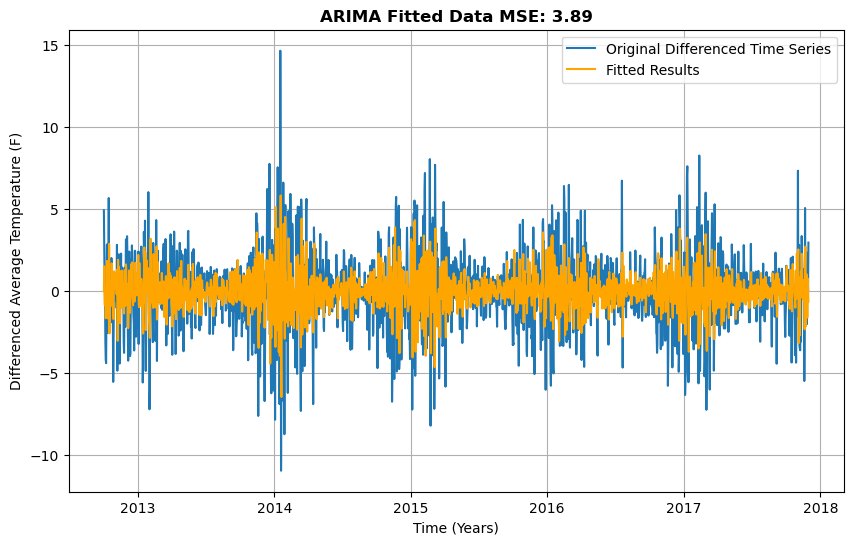

In [55]:
import itertools
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings #ignore user warning regarding setting parameters as zero to avoid infinite results

model = ARIMA(davg_df['USAvgTempDiff'], order=(1,0,3))  
results_x = model.fit()  
plt.figure(figsize=(10, 6))
plt.plot(davg_df['USAvgTempDiff'],label='Original Differenced Time Series')
plt.plot(results_x.fittedvalues, color='orange',label='Fitted Results')
mse = ((results_x.fittedvalues - davg_df['USAvgTempDiff'])**2).mean()
plt.title(f'ARIMA Fitted Data MSE: {mse:.2f}',fontweight='bold')
plt.xlabel('Time (Years)')
plt.ylabel('Differenced Average Temperature (F)')
plt.legend()
plt.grid(True)
plt.show()


In [56]:
davg_df.head(10)

,USAvgTemp,Points,USAvgTempDiff
DATE,,,
2012-10-02,64.808547,1,4.913953
2012-10-03,67.353028,2,2.544480
2012-10-04,67.712417,3,0.359389
2012-10-05,67.358139,4,-0.354278
2012-10-06,64.313792,5,-3.044347
2012-10-07,60.106250,6,-4.207542
2012-10-08,55.704611,7,-4.401639
2012-10-09,55.362847,8,-0.341764
2012-10-10,58.158069,9,2.795222


In [57]:
davg_df.tail(10)

,USAvgTemp,Points,USAvgTempDiff
DATE,,,
2017-11-21,50.375000,1877,5.050875
2017-11-22,49.114656,1878,-1.260344
2017-11-23,48.054875,1879,-1.059781
2017-11-24,50.102500,1880,2.047625
2017-11-25,52.444125,1881,2.341625
2017-11-26,50.423344,1882,-2.020781
2017-11-27,50.498969,1883,0.075625
2017-11-28,52.041175,1884,1.542206
2017-11-29,52.024938,1885,-0.016238


In [58]:
predictions_x = results_x.predict('11/30/2017', '12/30/2017') #show daily prediction for one month after dataset

In [59]:
predictions_x

2017-11-30   -0.636937
2017-12-01    1.157721
2017-12-02   -1.057119
2017-12-03   -1.034590
2017-12-04   -0.432205
2017-12-05   -0.182001
2017-12-06   -0.078077
2017-12-07   -0.034912
2017-12-08   -0.016983
2017-12-09   -0.009536
2017-12-10   -0.006443
2017-12-11   -0.005158
2017-12-12   -0.004625
2017-12-13   -0.004403
2017-12-14   -0.004311
2017-12-15   -0.004273
2017-12-16   -0.004257
2017-12-17   -0.004250
2017-12-18   -0.004248
2017-12-19   -0.004246
2017-12-20   -0.004246
2017-12-21   -0.004246
2017-12-22   -0.004246
2017-12-23   -0.004246
2017-12-24   -0.004246
2017-12-25   -0.004246
2017-12-26   -0.004246
2017-12-27   -0.004246
2017-12-28   -0.004246
2017-12-29   -0.004246
2017-12-30   -0.004246
Freq: D, Name: predicted_mean, dtype: float64

<font size="5">**Approach Two: SARIMA Model**</font>


**Proceed to Analyze data via SARIMA Model**
First thing we need is to check for seasonality, perform visual inspection on differenced data graph for seasonal pattern

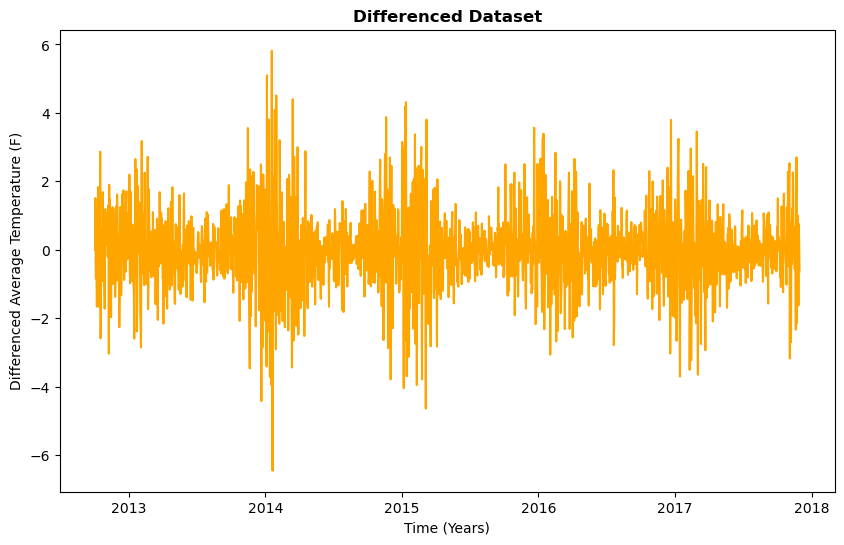

In [60]:
plt.figure(figsize = (10, 6))
plt.plot(results_x.fittedvalues, color='orange')
plt.title(f'Differenced Dataset',fontweight='bold')
plt.xlabel('Time (Years)')
plt.ylabel('Differenced Average Temperature (F)')
plt.show()

**Besides 2016-2017, Visual inspection shows there is a dip in the middle of each year which illustrates seasonality**

In [61]:
from pmdarima import auto_arima
sarimamodel_x = auto_arima(
    davg_df.USAvgTempDiff,   #time series data to model
    start_p=0,               #starting value for the order of the autoregressive (AR) component
    start_q=0,               #starting value for the order of the moving average (MA) component
    max_p=2,                 #limit the maximum AR order to 2
    max_q=2,                 #limit the maximum MA order to 2
    D=1,                     #differencing order for the seasonal component
    m=12,                    #seasonal period (12 for monthly data)
    seasonal=True,           #include a seasonal component in the model
    test="adf",              #adf unit root test for differencing
    trace=True,              #print diagnostic information during the fitting process
    alpha=0.05,              #significance level for hypothesis tests 5%
    information_criterion='aic',  #aic criteria for model selection
    suppress_warnings=True,  #suppress convergence warnings
    stepwise=True            #use a stepwise search for model selection
)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=17.01 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=9737.684, Time=0.14 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=9055.632, Time=3.92 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=16.22 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=9735.685, Time=0.15 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=9568.494, Time=0.45 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=8789.338, Time=10.52 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=47.73 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=23.78 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=8962.228, Time=7.52 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=8501.153, Time=10.46 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=8760.951, Time=4.77 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=33.65 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=25.44 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AI



**SARIMA values acquired:(2,0,0)(2,1,0)[12]**


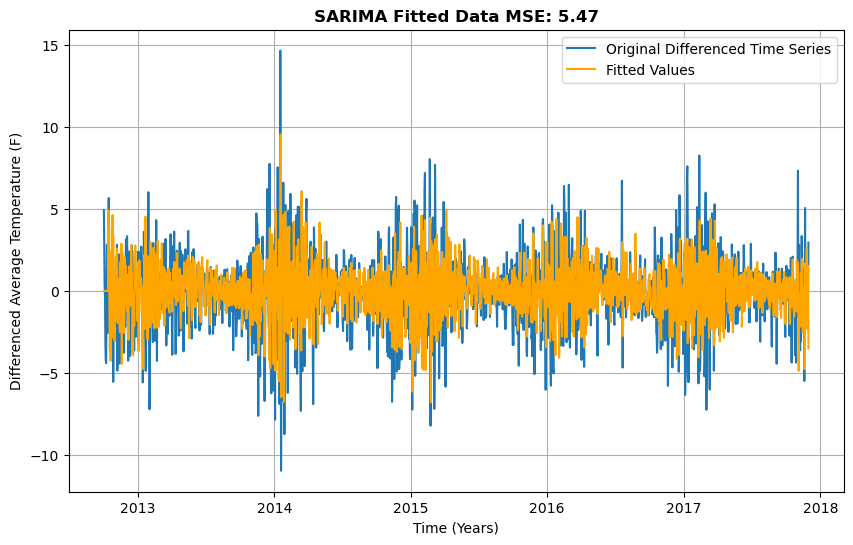

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

p, d, q = 2, 0, 0
P, D, Q, s = 2, 1, 0, 12

#create the SARIMA model with the specified seasonal and non-seasonal orders
sarima_model = SARIMAX(davg_df['USAvgTempDiff'], order=(2, 0, 0), seasonal_order=(2, 1, 0, 12))
results = sarima_model.fit(disp=False)

plt.figure(figsize=(10, 6))
plt.plot(davg_df['USAvgTempDiff'], label='Original Differenced Time Series')

plt.plot(results.fittedvalues, color='orange', label='Fitted Values')

#MSE calculation for SARIMA model
mse = ((results.fittedvalues - davg_df['USAvgTempDiff'])**2).mean()
plt.title(f'SARIMA Fitted Data MSE: {mse:.2f}',fontweight='bold')
plt.xlabel('Time (Years)')
plt.ylabel('Differenced Average Temperature (F)')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
#future predictions
predictions = results.predict('11/30/2017', '12/30/2017') #show daily prediction for one month after dataset

In [64]:
predictions

2017-11-30   -3.512404
2017-12-01   -0.741651
2017-12-02   -3.372644
2017-12-03   -1.756231
2017-12-04   -1.634617
2017-12-05    0.409344
2017-12-06    1.390965
2017-12-07    2.001489
2017-12-08    2.034107
2017-12-09   -0.346506
2017-12-10    0.058918
2017-12-11    1.461567
2017-12-12   -0.209578
2017-12-13   -3.252384
2017-12-14   -3.030122
2017-12-15    0.550579
2017-12-16   -2.045407
2017-12-17    0.011755
2017-12-18    2.310419
2017-12-19    2.023865
2017-12-20    0.155511
2017-12-21    0.174629
2017-12-22    0.337677
2017-12-23    0.945524
2017-12-24    0.937070
2017-12-25   -3.284114
2017-12-26   -2.755241
2017-12-27    1.476111
2017-12-28   -1.628845
2017-12-29   -0.256201
2017-12-30    1.925672
Freq: D, Name: predicted_mean, dtype: float64

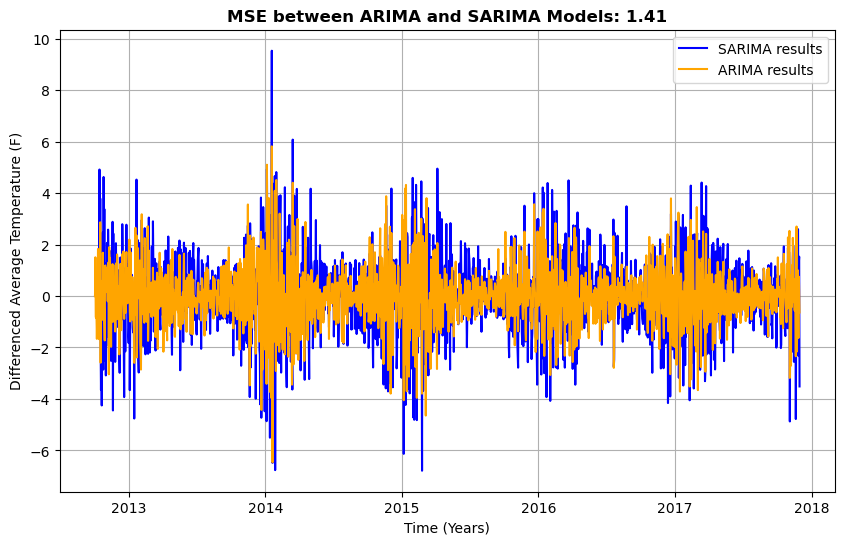

In [65]:
plt.figure(figsize=(10, 6))

plt.plot(results.fittedvalues, color='blue', label='SARIMA results')
plt.plot(results_x.fittedvalues, color='orange', label='ARIMA results')

#MSE calculation for ARIMA and SARIMA models comparison
mse = ((results.fittedvalues - results_x.fittedvalues)**2).mean()
plt.title(f'MSE between ARIMA and SARIMA Models: {mse:.2f}', fontweight='bold')
plt.xlabel('Time (Years)')
plt.ylabel('Differenced Average Temperature (F)')
plt.legend()
plt.grid(True)
plt.show()

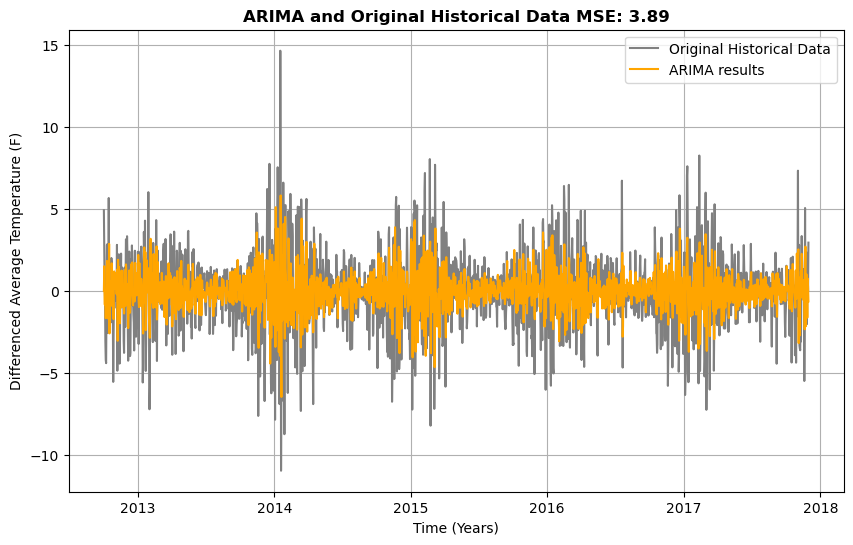

In [66]:
plt.figure(figsize=(10, 6))

plt.plot(davg_df['USAvgTempDiff'], color='gray', label='Original Historical Data')
#plt.plot(results.fittedvalues, color='blue', label='SARIMA results')
plt.plot(results_x.fittedvalues, color='orange', label='ARIMA results')

#MSE calculation for ARIMA and SARIMA models comparison
mse = ((results_x.fittedvalues - davg_df['USAvgTempDiff'])**2).mean()
plt.title(f'ARIMA and Original Historical Data MSE: {mse:.2f}',fontweight='bold')
plt.xlabel('Time (Years)')
plt.ylabel('Differenced Average Temperature (F)')
plt.legend()
plt.grid(True)
plt.show()

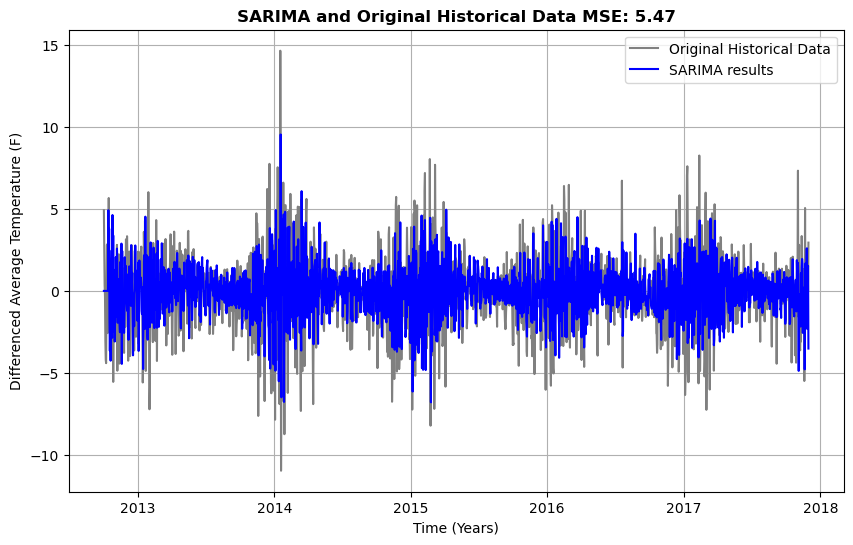

In [67]:
plt.figure(figsize=(10, 6))

plt.plot(davg_df['USAvgTempDiff'], color='gray', label='Original Historical Data')
plt.plot(results.fittedvalues, color='blue', label='SARIMA results')
#plt.plot(results_x.fittedvalues, color='orange', label='ARIMA results')

#MSE calculation for ARIMA and SARIMA models comparison
mse = ((results.fittedvalues - davg_df['USAvgTempDiff'])**2).mean()
plt.title(f'SARIMA and Original Historical Data MSE: {mse:.2f}',fontweight='bold')
plt.xlabel('Time (Years)')
plt.ylabel('Differenced Average Temperature (F)')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
sarimaforecast = predictions
arimaforecast = predictions_x

In [69]:
def inverse_difference(series_diff, first_value):
    return np.r_[first_value,series_diff].cumsum().astype('float64')

sinv = inverse_difference(predictions, davg_df['USAvgTemp'][0])
ainv = inverse_difference(predictions_x, davg_df['USAvgTemp'][0])

for i in range(len(predictions)):
    sarimaforecast[i] = sinv[i]
    
for i in range(len(predictions_x)):
    arimaforecast[i] = ainv[i]

In [70]:
sarimaforecast

2017-11-30    64.808547
2017-12-01    61.296143
2017-12-02    60.554492
2017-12-03    57.181848
2017-12-04    55.425617
2017-12-05    53.791000
2017-12-06    54.200344
2017-12-07    55.591309
2017-12-08    57.592799
2017-12-09    59.626906
2017-12-10    59.280400
2017-12-11    59.339318
2017-12-12    60.800885
2017-12-13    60.591307
2017-12-14    57.338922
2017-12-15    54.308800
2017-12-16    54.859379
2017-12-17    52.813972
2017-12-18    52.825728
2017-12-19    55.136147
2017-12-20    57.160012
2017-12-21    57.315523
2017-12-22    57.490152
2017-12-23    57.827829
2017-12-24    58.773353
2017-12-25    59.710423
2017-12-26    56.426309
2017-12-27    53.671068
2017-12-28    55.147179
2017-12-29    53.518334
2017-12-30    53.262133
Freq: D, Name: predicted_mean, dtype: float64

In [71]:
arimaforecast

2017-11-30    64.808547
2017-12-01    64.171610
2017-12-02    65.329331
2017-12-03    64.272212
2017-12-04    63.237622
2017-12-05    62.805417
2017-12-06    62.623416
2017-12-07    62.545339
2017-12-08    62.510427
2017-12-09    62.493444
2017-12-10    62.483908
2017-12-11    62.477465
2017-12-12    62.472306
2017-12-13    62.467682
2017-12-14    62.463279
2017-12-15    62.458968
2017-12-16    62.454695
2017-12-17    62.450438
2017-12-18    62.446188
2017-12-19    62.441940
2017-12-20    62.437694
2017-12-21    62.433448
2017-12-22    62.429202
2017-12-23    62.424957
2017-12-24    62.420711
2017-12-25    62.416466
2017-12-26    62.412220
2017-12-27    62.407975
2017-12-28    62.403729
2017-12-29    62.399483
2017-12-30    62.395238
Freq: D, Name: predicted_mean, dtype: float64

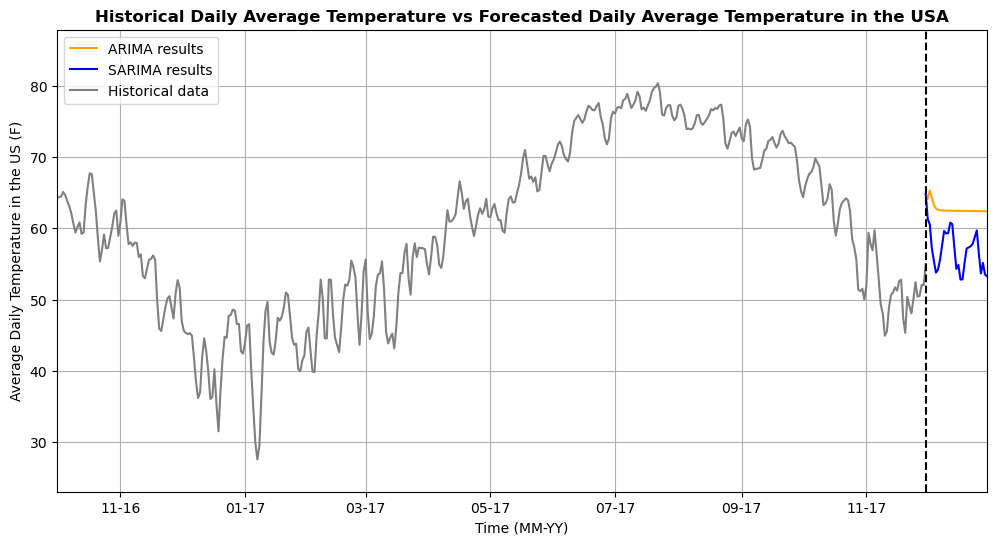

In [72]:
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

#stest = sarimaforecast[3:]
#atest = arimaforecast[3:]
#plt.plot(stest, color='blue', label='SARIMA test results')
#plt.plot(atest, color='orange', label='ARIMA test results')
plt.figure(figsize=(12, 6))
plt.plot(arimaforecast, color='orange', label='ARIMA results')
plt.plot(sarimaforecast, color='blue', label='SARIMA results')
plt.plot(davg_df['USAvgTemp'], color='gray', label='Historical data')

left = dt.date(2016, 10, 1)
right = dt.date(2017, 12, 30)

plt.axvline(dt.date(2017, 11, 30), color='black', linestyle='--')
plt.title('Historical Daily Average Temperature vs Forecasted Daily Average Temperature in the USA', fontweight='bold')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))
plt.gca().set_xbound(left, right)
plt.xlabel('Time (MM-YY)')
plt.ylabel('Average Daily Temperature in the US (F)')
plt.legend()
plt.grid(True)
plt.show()


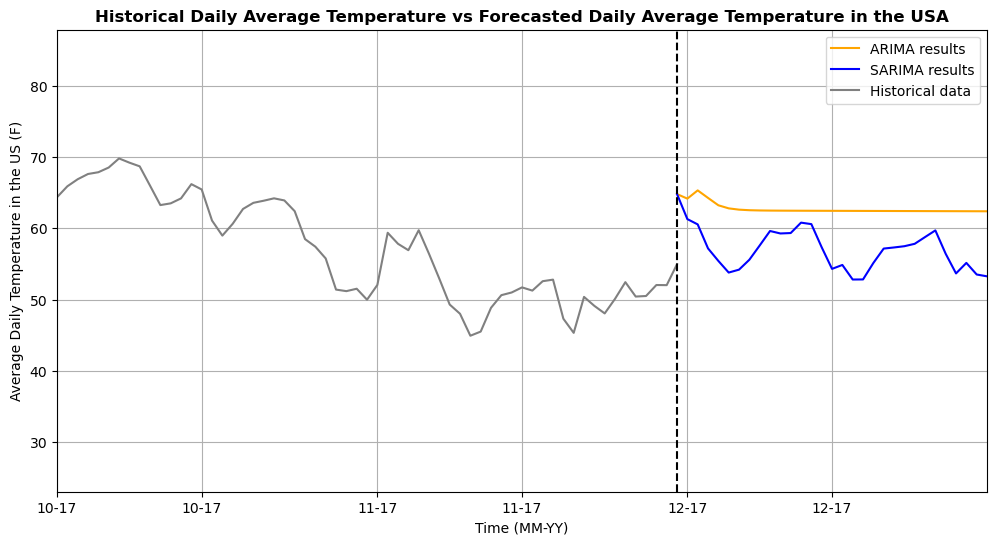

In [73]:
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

#stest = sarimaforecast[3:]
#atest = arimaforecast[3:]
#plt.plot(stest, color='blue', label='SARIMA test results')
#plt.plot(atest, color='orange', label='ARIMA test results')
plt.figure(figsize=(12, 6))
plt.plot(arimaforecast, color='orange', label='ARIMA results')
plt.plot(sarimaforecast, color='blue', label='SARIMA results')
plt.plot(davg_df['USAvgTemp'], color='gray', label='Historical data')

plt.axvline(dt.date(2017, 11, 30), color='black', linestyle='--')

left = dt.date(2017, 10, 1)
right = dt.date(2017, 12, 30)

plt.title('Historical Daily Average Temperature vs Forecasted Daily Average Temperature in the USA', fontweight='bold')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))
plt.gca().set_xbound(left, right)
plt.xlabel('Time (MM-YY)')
plt.ylabel('Average Daily Temperature in the US (F)')
plt.legend()
plt.grid(True)
plt.show()